# Univariate Linear Regression (a.k.a Simple Linear Regression)

#### This is a type of Linear Regression which has only one feature as input. I'll use the California housing dataset to demonstrate the Univariate Linear Regression.

#### I'll use the dataset from sci-kit learn library

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
dataset=fetch_california_housing()

#### I'll use the pandas dataframe to show the dataset contents

In [4]:
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

#### This dataframe contains only the features. Now, I'll add the target variable which is "Pricing" to the Dataframe "df"

In [5]:
df["Pricing"]=pd.Series(data=dataset.target)

In [6]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Pricing
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Since were trying to show the linear relationship between two variables. I'll see the correlation between the target variable and all the features. Then, select the feature with the highest corrleation as the feature variable for our univariate linear regression.

<IPython.core.display.Javascript object>


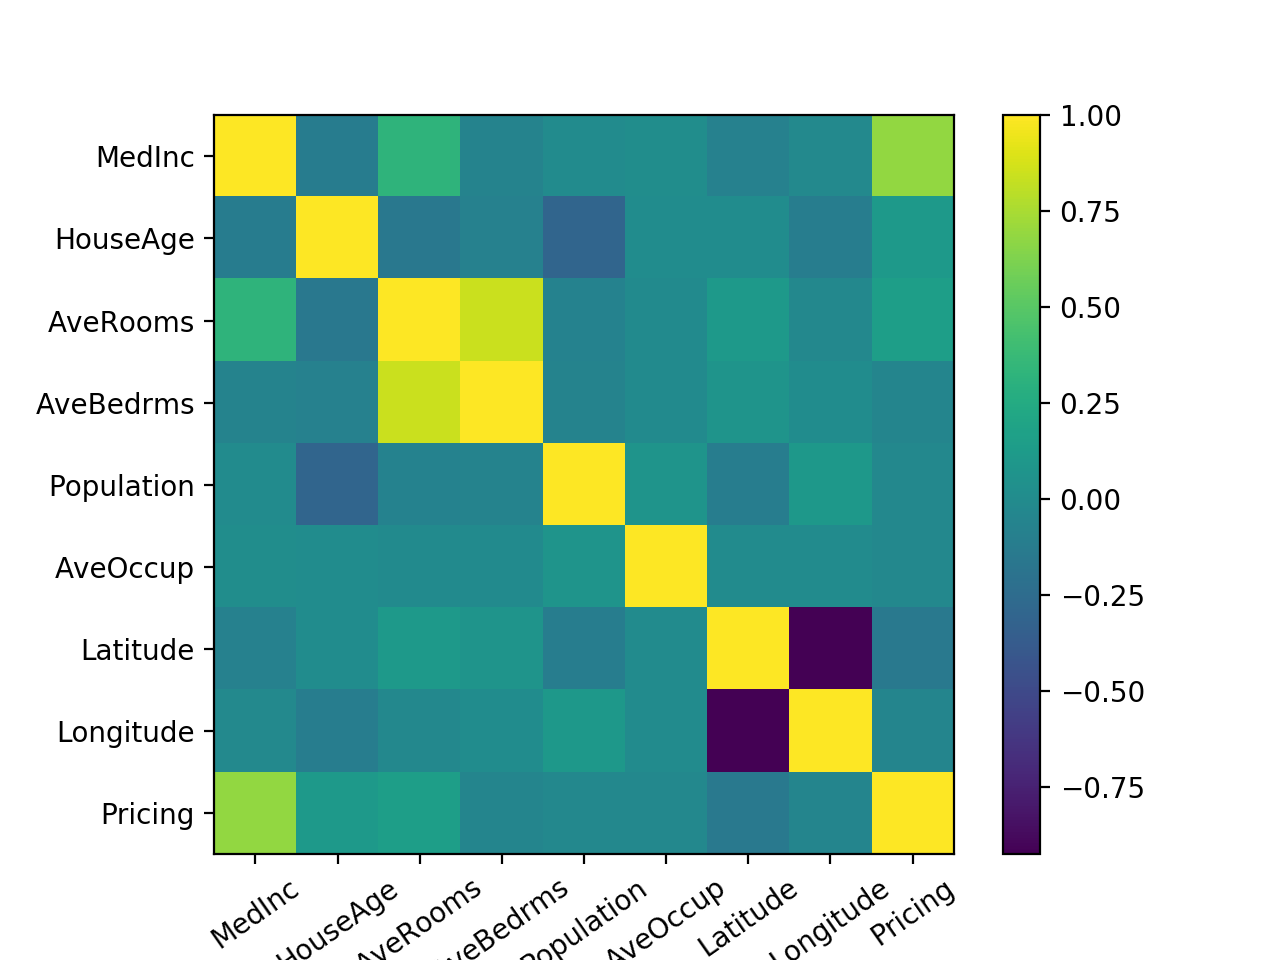

In [7]:
plt.imshow(df.corr())
plt.colorbar()
plt.gca().set_xticks(np.arange(len(df.columns.values)))
plt.gca().set_xticklabels(list(df.columns.values))
plt.gca().set_yticks(np.arange(len(df.columns.values)))
plt.gca().set_yticklabels(list(df.columns.values))
plt.xticks(rotation=35)
plt.show()

#### Okay now, i'll select the "MedInc" as our feature variable since it has the highest corrleation with the target variable.

In [8]:
x=np.array(df["MedInc"])
y=np.array(df["Pricing"])
a=[0]
b=[0]

In [9]:
def univariate_LinearRegression(xi,yi,iterations):
    initial_c=0
    initial_m=0
    c,m=model(initial_c,initial_m,xi,yi,iterations)
    print "slope",m,"intercept",c

In [10]:
def model(c,m,xi,true,iterations):
    for _ in range(iterations):
        c,m=gradient_descent(c,m,xi,true)
        a.append(m)
        b.append(c)
        if _%10==0:
            print "error at {} iteration is {}".format(_,cost_function(c,m,xi,true))
    print "error at {} iteration is {}".format(iterations,cost_function(c,m,xi,true))
    return c,m

#### The cost function is used to assess how well our model is performing as well as to calculate the error. The cost function used is as follows:
#### Cost function = 
\begin{equation*}
\frac{1}{2N} \times \sum_{i=1}^N ({(m * x_i + c)-y_i})^2
\end{equation*}

#### where N is the number of samples.

In [11]:
def cost_function(c,m,xi,true):
    error=0
    N=float(len(xi))
    for i in range(len(xi)):
        error +=(((m*xi[i]+c)-true[i])**2)/(2*N)
    return error

#### The gradient descent is the learning part of the algorithm. Here, we need to update both the m and c variable so as to reduce the error rate.
#### Gradient Descent
\begin{equation*}
mgd = \frac{1}{N} \times \sum_{i=1}^N ({(m * x_i + c)-y_i}) * x_i\\
cgd = \frac{1}{N} \times \sum_{i=1}^N ({(m * x_i + c)-y_i})
\end{equation*}

#### Now we need to update the m and c values.
\begin{equation*}
m = m - (\alpha * mgd) \\
c = c - (\alpha * cgd)
\end{equation*}

#### where alpha is the learning rate.

In [12]:
def gradient_descent(c,m,xi,true,learning_rate=0.1):
    c_gd=m_gd=0
    N=float(len(xi))
    for i in range(len(xi)):
        c_gd += ((m*xi[i]+c)-true[i])*(1/N)
        m_gd += ((xi[i])*((m*xi[i]+c)-true[i]))*(1/N)
    c=c-(learning_rate*(c_gd))
    m=m-(learning_rate*(m_gd))
    return c,m

In [13]:
def animate(iterate):
    if iterate == len(a)-1:
        P.event_source.stop()
    else:
        plt.cla()
        plt.axis([0.0,15.0,-1.0,6.0])
        plt.scatter(x,y,c='gold',marker="H")
        plt.xlabel("Income")
        plt.ylabel("Pricing")
        plt.title("Univariate Linear Regression")
        plt.plot(x,a[iterate]*x+b[iterate],'r')
        plt.show()

In [14]:
univariate_LinearRegression(x,y,50)

error at 0 iteration is 2.52286407456
error at 10 iteration is 0.992292212285
error at 20 iteration is 0.541881824285
error at 30 iteration is 0.408790185403
error at 40 iteration is 0.369088558004
error at 50 iteration is 0.35766888432
slope 0.42364048872039783 intercept 0.31008696198252356


<IPython.core.display.Javascript object>


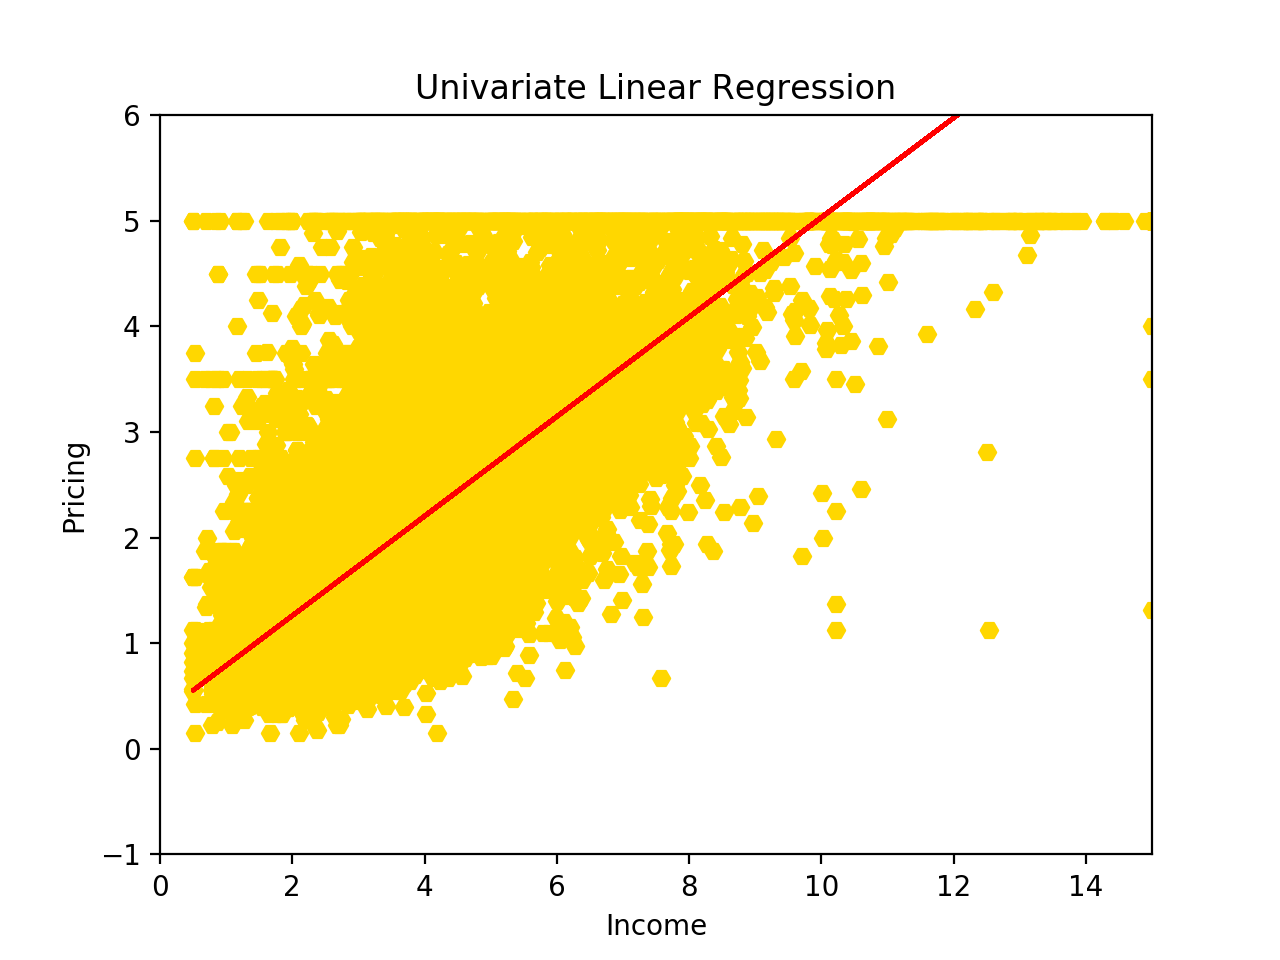

In [15]:
fig=plt.figure()
P=animation.FuncAnimation(fig, animate, interval=10)